In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
exp7 = pd.read_csv("cosine_similarity_exp7.csv")

In [31]:
testinfo = pd.read_csv("test_info.csv")

In [44]:
forgeryImages = testinfo[testinfo["artist"].isin([613,118])]
#Han van Meegeren = 613
#Johannes Vermeer= 118

In [45]:
forgeryResults = exp7[(exp7["image1"].isin(forgeryImages["filename"])) & (exp7["image2"].isin(forgeryImages["filename"]))]

In [46]:
df = forgeryResults.join(forgeryImages.set_index('filename'), on='image1')
df = df.join(forgeryImages.set_index('filename'), on='image2', lsuffix='1', rsuffix='2')

In [47]:
df = df.drop('index', axis=1)
df.head(10)

image1      image2  sameArtist      dist  artist1  artist2
4206   101203.jpg  100316.jpg        True  0.245367      613      613
14025   10222.jpg  100316.jpg        True  0.383359      613      613
14053   10222.jpg  101203.jpg        True -0.011683      613      613
44115   11168.jpg  100316.jpg       False -0.015619      118      613
44143   11168.jpg  101203.jpg       False  0.101673      118      613
44172   11168.jpg   10222.jpg       False -0.103085      118      613
55604   11699.jpg  100316.jpg        True  0.029357      613      613
55632   11699.jpg  101203.jpg        True  0.090524      613      613
55661   11699.jpg   10222.jpg        True  0.029607      613      613
55700   11699.jpg   11168.jpg       False  0.238029      613      118

In [48]:
sameArtist = df[df['sameArtist']==True]
sameArtist613 = sameArtist[sameArtist['artist1']==613]
sameArtist118 = sameArtist[sameArtist['artist1']==118]
print('Average Han van Meegeren', sameArtist613['dist'].mean())
print('Average Johannes Vermeer', sameArtist118['dist'].mean())

Average Han van Meegeren 0.11627101518863224
Average Johannes Vermeer 0.2314309858290168


Text(0.5, 1.0, 'Dinner at Emmaus (Han van Meegeren)')

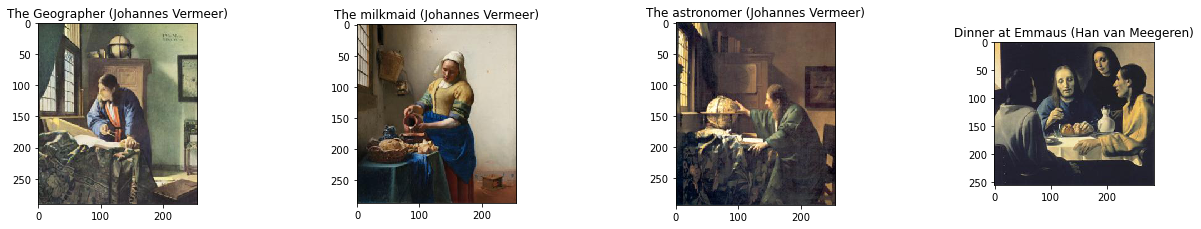

In [49]:
### Three famous paintings of Vermeer and the forgery that was sold as Vermeer ###

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=1)

image1 = plt.imread('test_resized/53752.jpg')
image2 = plt.imread('train_resized/68866.jpg')
image3 = plt.imread('test_resized/54806.jpg')
image4 = plt.imread('test_resized/53324.jpg')
axs[0].imshow(image1, interpolation='none')
axs[0].set_title('The Geographer (Johannes Vermeer)')
axs[1].imshow(image2, interpolation='none')
axs[1].set_title('The milkmaid (Johannes Vermeer)')
axs[2].imshow(image3, interpolation='none')
axs[2].set_title('The astronomer (Johannes Vermeer)')
axs[3].imshow(image4, interpolation='none')
axs[3].set_title('Dinner at Emmaus (Han van Meegeren)')

Text(69.0, 0.5, 'Han van Meegeren')

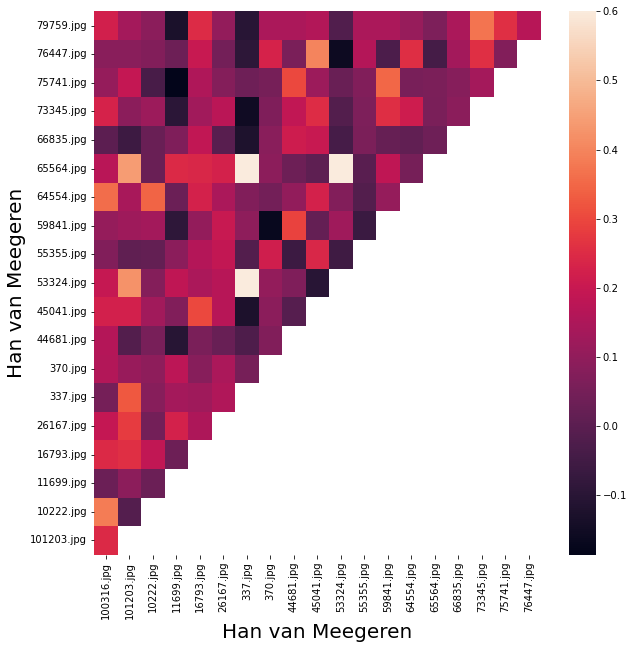

In [50]:
### Heatmap for the forger Han van Meegeren (only his images) ###
fig, ax = plt.subplots(figsize=(10,10)) 

same613 = sameArtist613.pivot("image1", "image2", "dist")
sns.heatmap(same613, vmax=0.6,ax=ax)
figsize=(10, 10)
ax.invert_yaxis()
ax.set_xlabel('Han van Meegeren', fontsize=20)
ax.set_ylabel('Han van Meegeren', fontsize=20)


# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the highest score', fontsize=20)

# image1 = plt.imread('test_resized/53324.jpg')
# image2 = plt.imread('test_resized/65564.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')

# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the lowest score', fontsize=20)

# image1 = plt.imread('test_resized/44681.jpg')
# image2 = plt.imread('test_resized/337.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')

Text(69.0, 0.5, 'Johannes Vermeer')

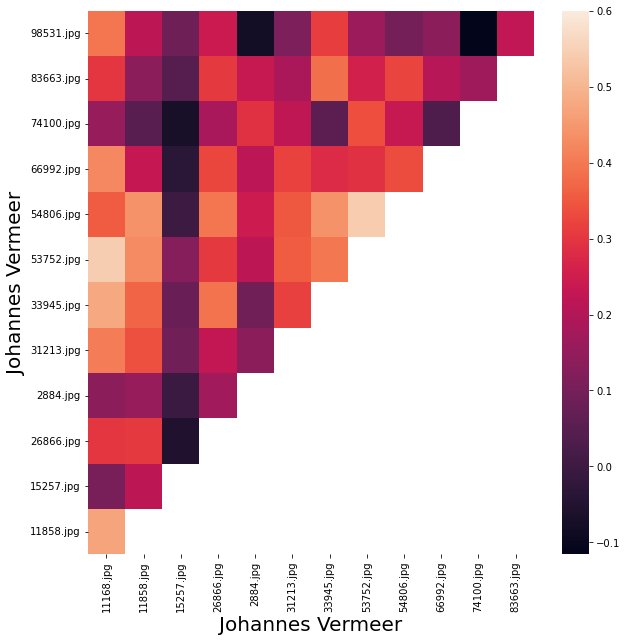

In [51]:
### Heatmap for Johannes Vermeer (only his images) ###
fig, ax = plt.subplots(figsize=(10,10)) 

same118 = sameArtist118.pivot("image1", "image2", "dist")
sns.heatmap(same118, vmax=0.6, ax=ax)
figsize=(10, 10)
ax.invert_yaxis()
ax.set_xlabel('Johannes Vermeer', fontsize=20)
ax.set_ylabel('Johannes Vermeer', fontsize=20)

# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the highest score', fontsize=20)

# image1 = plt.imread('test_resized/11858.jpg')
# image2 = plt.imread('test_resized/54806.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')

# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the lowest score', fontsize=20)

# image1 = plt.imread('test_resized/74100.jpg')
# image2 = plt.imread('test_resized/15257.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')

In [52]:
differentArtist = df[df['sameArtist']==False]
print('Average both Artists', differentArtist['dist'].mean())

Average both Artists 0.05853064183773732


In [53]:
differentArtist = differentArtist.drop(differentArtist[differentArtist.artist1 == 613].index)

Text(69.0, 0.5, 'Johannes Vermeer')

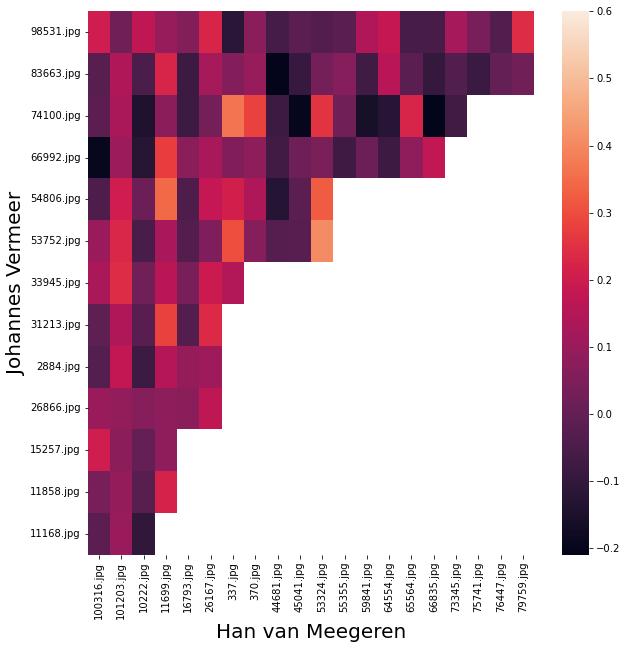

In [54]:
### Heatmap for both artists on different axis ###
# x-axis: images by Han van Meegeren
# y-axis: images by Johannes Vermeer
fig, ax = plt.subplots(figsize=(10,10)) 

different = differentArtist.pivot("image1", "image2", "dist")
sns.heatmap(different, vmax=0.6, ax=ax)
figsize=(10, 10)
ax.invert_yaxis()
ax.set_xlabel('Han van Meegeren', fontsize=20)
ax.set_ylabel('Johannes Vermeer', fontsize=20)

# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the highest score', fontsize=20)

# image1 = plt.imread('test_resized/337.jpg')
# image2 = plt.imread('test_resized/74100.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')

# fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))
# #fig.subplots_adjust(hspace = 0.5, wspace=1)
# fig.suptitle('The two pictures with the lowest score', fontsize=20)

# image1 = plt.imread('test_resized/44681.jpg')
# image2 = plt.imread('test_resized/83663.jpg')
# axs[0].imshow(image1, interpolation='none')
# axs[1].imshow(image2, interpolation='none')